# EDA

Anime has grown into a massive entertainment industry with thousands of titles spanning various genres, making it challenging for viewers to find anime that match their preferences. With the increasing availability of anime streaming platforms, users often struggle to discover new series that align with their tastes. Traditional recommendation methods, such as user reviews and popularity rankings, can be biased and may not always provide personalized suggestions.

#### Objective
The objective of this project is to develop an Anime Recommendation System that provides personalized recommendations based on user preferences. By leveraging user ratings and anime metadata, the system aims to suggest anime that align with individual tastes, enhancing the overall viewing experience.

#### Problem Statement
With the vast number of anime available, manually finding relevant recommendations is time-consuming and inefficient. Current recommendation methods on streaming platforms often rely on general popularity rather than personalized preferences. The lack of a robust recommendation system leads to users missing out on potentially enjoyable anime. This project aims to address this challenge by implementing a data-driven recommendation system using collaborative filtering, content-based filtering, or hybrid approaches to improve anime discovery and user satisfaction.

### Dataset Description 

- **Anime.csv**
 
    - **anime_id**: Unique identifier assigned to each anime.
    - **name**: Title of the anime.
    - **genres**: List of genres associated with the anime, separated by commas.
    - **average_rating**: The average score or rating given to the anime based on user reviews.
    - **overview**: A brief synopsis or description of the anime's plot.
    - **type**: The format of the anime (e.g., TV series, Movie, OVA, etc.).
    - **episodes**: The total number of episodes in the anime.
    - **producers**: Companies responsible for planning and funding the anime's production.
    - **licensors**: Companies that have licensed the anime for distribution outside Japan.
    - **studios**: The animation studios that created the anime.
    - **source**: The original source material of the anime (e.g., Manga, Light Novel, Original).
    - **anime_rating**: The age rating assigned to the anime (e.g., PG-13, R-17+).
    - **rank**: The rank of the anime based on its rating and user scores.
    - **popularity**: The rank of the anime based on the number of users who have interacted with it.
    - **favorites**: The number of times the anime has been marked as a favorite by users.
    - **scored by**: The total number of users who have given a rating to the anime.
    - **members**: The total number of users who have added the anime to their watchlist or collection.
    - **image url**: The URL link to the anime's poster or cover image. 

- **UserRatings.csv**

    - **user_id**: Unique identifier assigned to each user.
    - **username**: The username of the user who rated the anime.
    - **anime_id**: Unique identifier of the anime that was rated.
    - **rating**: The score or rating given by the user to the anime.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore")

#### Reading our Dataset

In [2]:
# Setting column display to 50
pd.set_option('display.max_columns', 50)

In [3]:
df_anime=pd.read_csv('/home/karthikponna/kittu/Anime Recommendation System - MLops-github/Anime-Recommendation-System/Artifacts/01_29_2025_07_55_09/data_ingestion/feature_store/Animes.csv')
print("Shape of the Dataset:",df_anime.shape)
df_anime.head(3).T

Shape of the Dataset: (12194, 18)


,0,1,2
anime_id,32281,5114,28977
genres,"Drama, Romance, School, Supernatural","Action, Adventure, Drama, Fantasy, Magic, Mili...","Action, Comedy, Historical, Parody, Samurai, S..."
name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°
average_rating,8.85,9.1,9.06
overview,"Mitsuha Miyamizu, a high school girl, yearns t...",After a horrific alchemy experiment goes wrong...,"Gintoki, Shinpachi, and Kagura return as the f..."
type,Movie,TV,TV
episodes,1,64,51
producers,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","TV Tokyo, Aniplex, Dentsu"
licensors,"Funimation, NYAV Post","Funimation, Aniplex of America","Funimation, Crunchyroll"
studios,CoMix Wave Films,Bones,Bandai Namco Pictures


In [4]:
df_score=pd.read_csv('/home/karthikponna/kittu/Anime Recommendation System - MLops-github/Anime-Recommendation-System/Artifacts/01_29_2025_07_55_09/data_ingestion/feature_store/UserRatings.csv')
df_score.rename(columns={'Username':'username','Anime Title':"name"},inplace=True)
print("Shape of the dataset:",df_score.shape)
df_score.head()

Shape of the dataset: (1112830, 4)


,user_id,username,anime_id,rating
0,357,zhambi,35427,5
1,357,zhambi,28391,6
2,357,zhambi,36649,7
3,357,zhambi,530,6
4,357,zhambi,37451,7


## Explorartory Data Analysis

### Data Exploration

#### Checking each dataframe
In order to gain a better understanding of the data, it is important to examine each DataFrame individually. This includes assessing its structure and identifying any missing values. We will begin this process by using the info() method, which provides a comprehensive overview of the DataFrame's columns and structure.

In [5]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12194 entries, 0 to 12193
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   anime_id        12194 non-null  int64 
 1   genres          12133 non-null  object
 2   name            12194 non-null  object
 3   average_rating  12194 non-null  object
 4   overview        12194 non-null  object
 5   type            12194 non-null  object
 6   episodes        12194 non-null  object
 7   producers       12194 non-null  object
 8   licensors       12194 non-null  object
 9   studios         12194 non-null  object
 10  source          12194 non-null  object
 11  anime_rating    12194 non-null  object
 12  rank            12194 non-null  object
 13  popularity      12194 non-null  int64 
 14  favorites       12194 non-null  int64 
 15  scored by       12194 non-null  object
 16  members         12194 non-null  int64 
 17  image url       12194 non-null  object
dtypes: int

#### Checking Unknown/Nan values
We have unknown values in type, genres, producers, licensors, studios, anime_rating, ratings etc.

In [6]:
df_anime['average_rating'].value_counts()

average_rating
UNKNOWN    1617
6.51         57
7.03         57
6.54         55
6.31         54
           ... 
3.99          1
3.55          1
3.31          1
4.17          1
3.48          1
Name: count, Length: 552, dtype: int64

In [7]:
average_rating = df_anime['average_rating'][df_anime['average_rating'] != 'UNKNOWN']
average_rating = average_rating.astype('float')
average_rating_mean= round(average_rating.mean() , 2)

In [8]:
df_anime['average_rating'] = df_anime['average_rating'].replace('UNKNOWN', average_rating_mean)
df_anime['average_rating'] = df_anime['average_rating'].astype('float64')

In [9]:
df_anime['rank'].value_counts()

rank
UNKNOWN    1650
12591         4
7175          4
6542          4
7747          4
           ... 
5425          1
4968          1
5472          1
5145          1
2537          1
Name: count, Length: 8846, dtype: int64

In [10]:
df_anime['rank'] = df_anime['rank'].replace('UNKNOWN', np.nan)
df_anime['rank'] = df_anime['rank'].astype('float64')

In [11]:
df_anime.isnull().sum()

anime_id             0
genres              61
name                 0
average_rating       0
overview             0
type                 0
episodes             0
producers            0
licensors            0
studios              0
source               0
anime_rating         0
rank              1650
popularity           0
favorites            0
scored by            0
members              0
image url            0
dtype: int64

There are 1650 nan values in rank column and genres have 61 nan values.

In [12]:
df_score.isnull().sum()

user_id     0
username    0
anime_id    0
rating      0
dtype: int64

The userratings dataframe doesn't have any null values.

### Data Visualization

#### For Anime Dataset

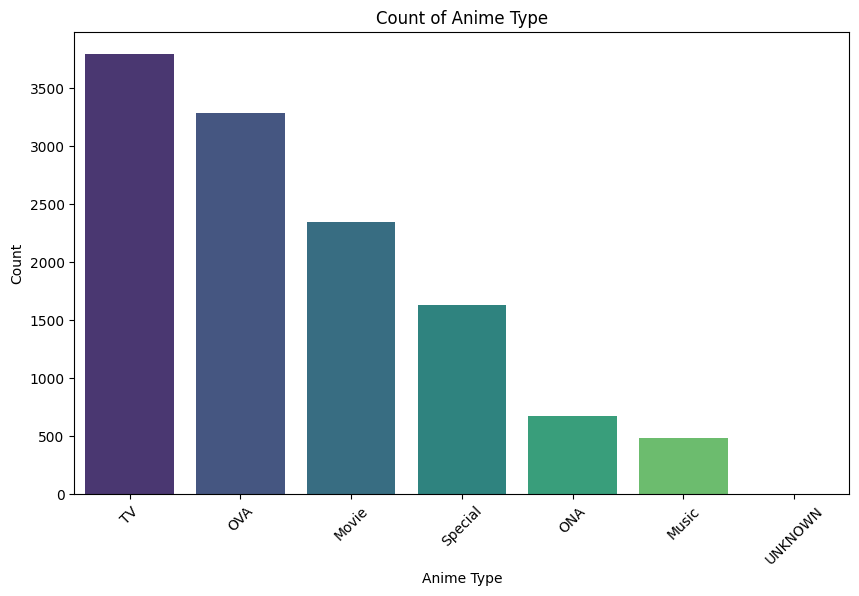

In [13]:
# Count the number of anime titles by type
type_counts = df_anime['type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis',legend=False)
plt.title('Count of Anime Type' )
plt.xlabel('Anime Type' )
plt.ylabel('Count' )
plt.xticks(rotation=45)
plt.show()

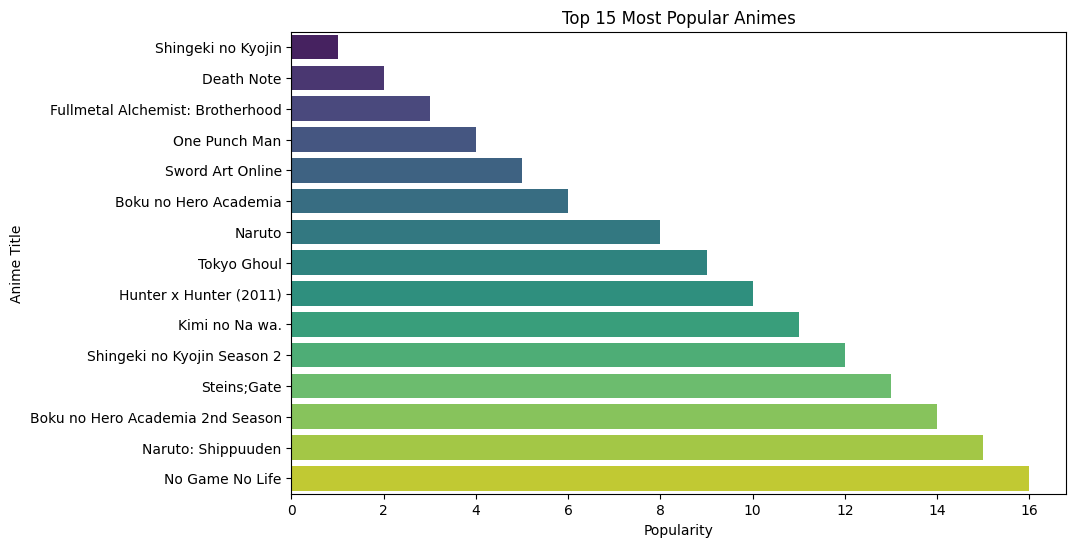

In [14]:
df_valid_popularity = df_anime[df_anime['popularity'] > 0]
top_10_popular = df_valid_popularity.sort_values(by='popularity', ascending=True).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='name', data=top_10_popular, hue='name', palette='viridis', legend=False)
plt.xlabel('Popularity')
plt.ylabel('Anime Title')
plt.title('Top 15 Most Popular Animes')
plt.show()

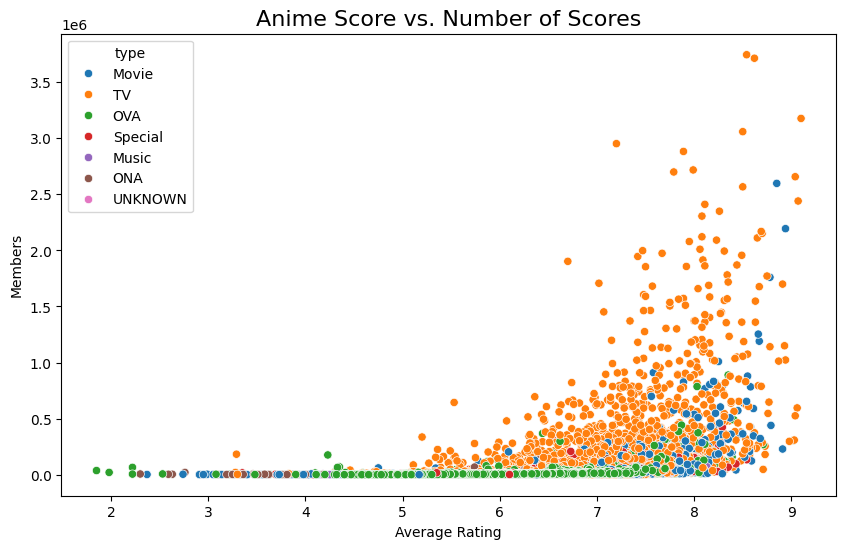

In [15]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_anime, x='average_rating', y='members', hue='type', palette='tab10')
plt.title('Anime Score vs. Number of Scores', fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Members")
plt.show()

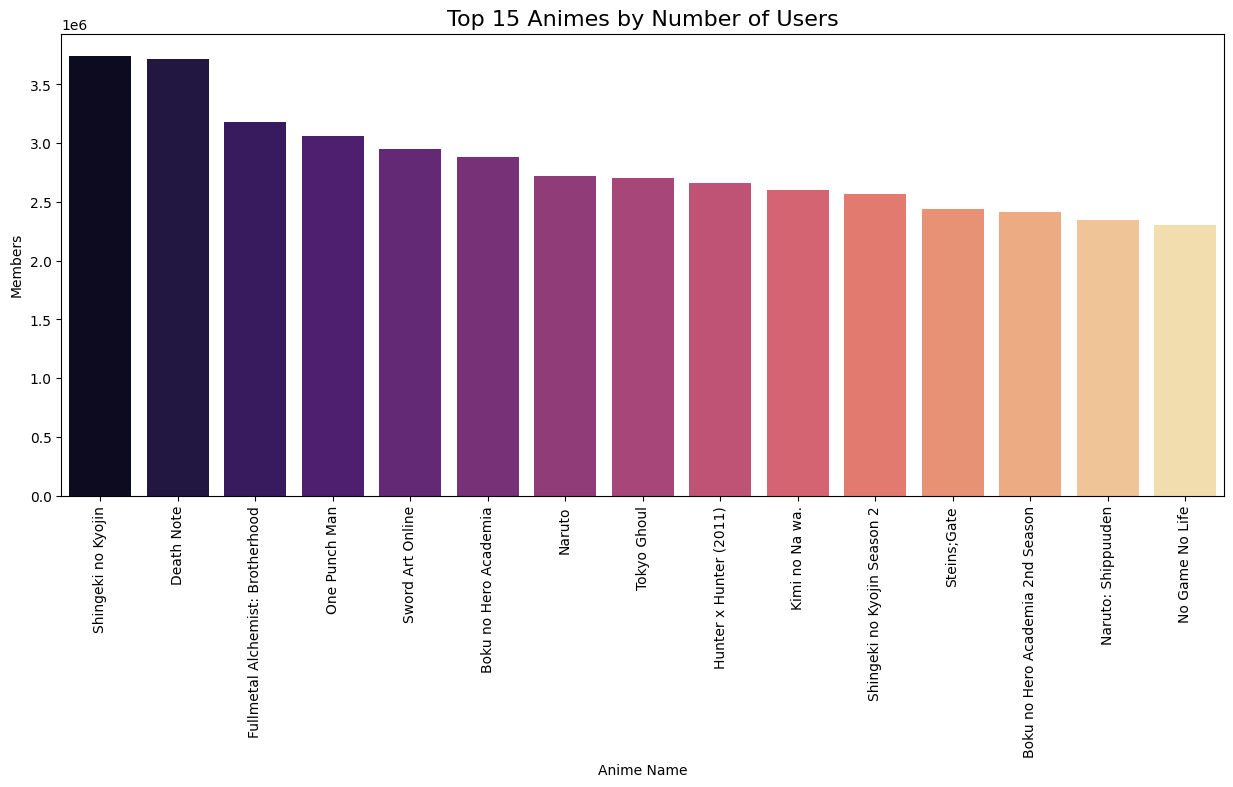

In [16]:
# Sort the dataframe by the number of users who have rated the anime
top_15_scored = df_anime.sort_values(by='members', ascending=False).head(15)
plt.figure(figsize=(15,6))
sns.barplot(x='name', y='members', data=top_15_scored, palette='magma')
plt.title('Top 15 Animes by Number of Users', fontsize=16)
plt.xlabel("Anime Name")
plt.ylabel("Members")
plt.xticks(rotation=90)
plt.show()

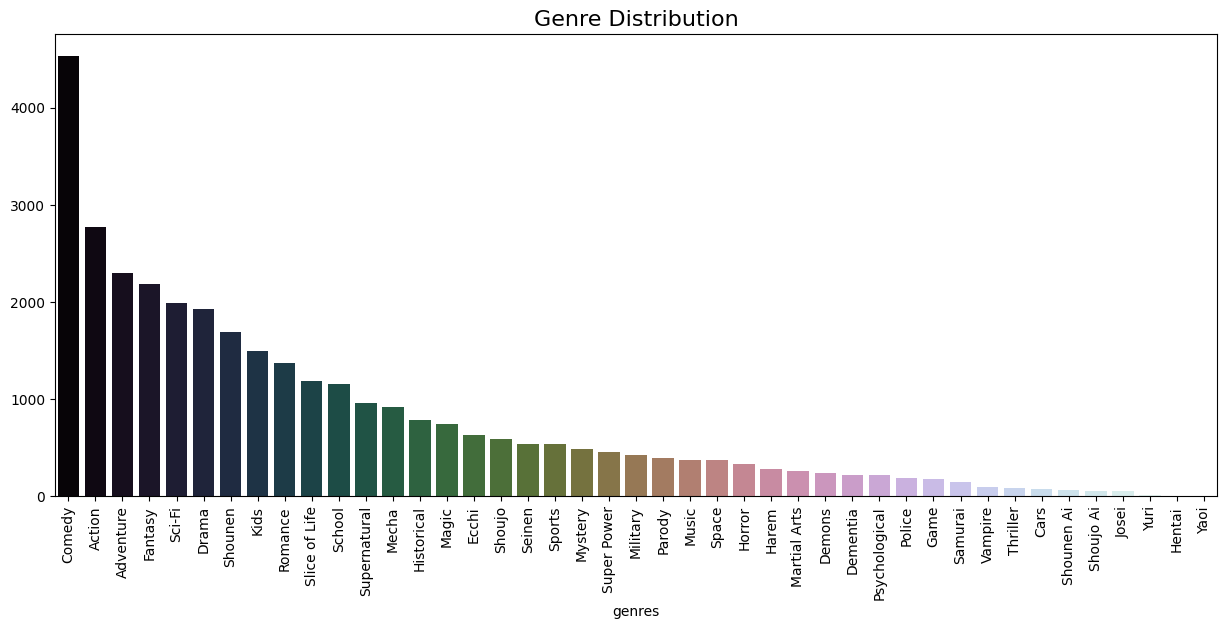

In [17]:
nonnullanimes = df_anime.copy()
nonnullanimes.dropna(inplace = True) 
genre_counts = nonnullanimes[nonnullanimes['genres'] != "UNKNOWN"]['genres'].apply(lambda x: x.split(', ')).explode().value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='cubehelix')
plt.title('Genre Distribution', fontsize=16)
plt.xticks(rotation=90)
plt.show()

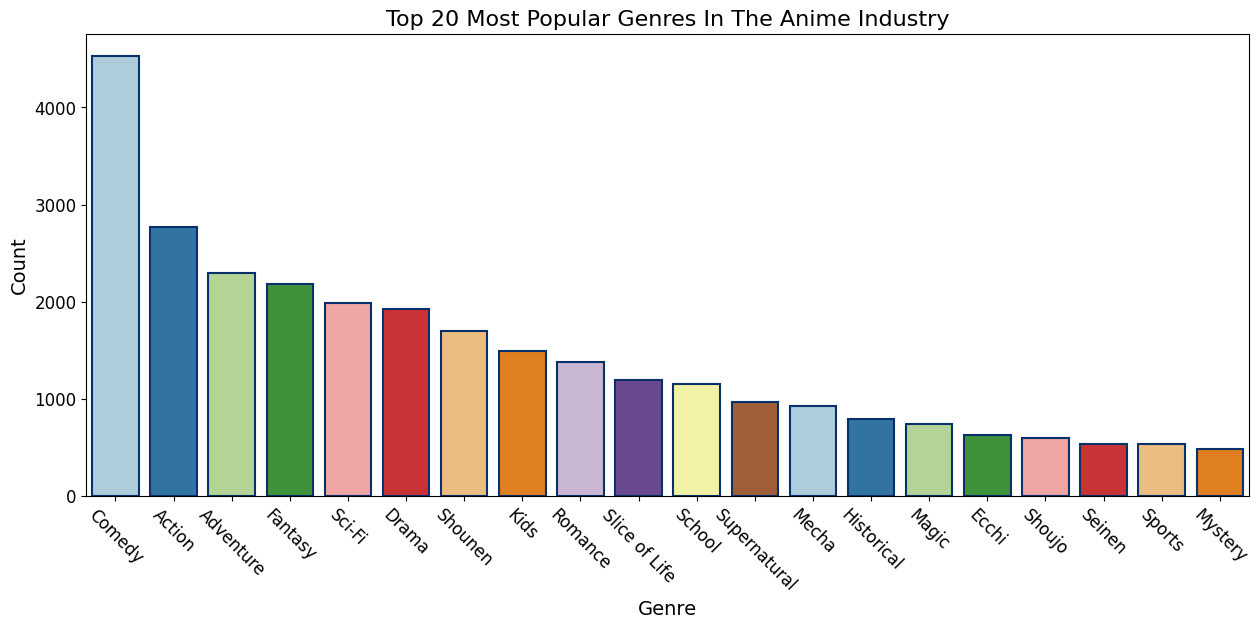

In [18]:
top_20_genres = genre_counts.head(20) 
plt.figure(figsize=(15, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values, palette='Paired', edgecolor=(8/255, 48/255, 107/255), linewidth=1.5)
plt.title('Top 20 Most Popular Genres In The Anime Industry', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=-45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

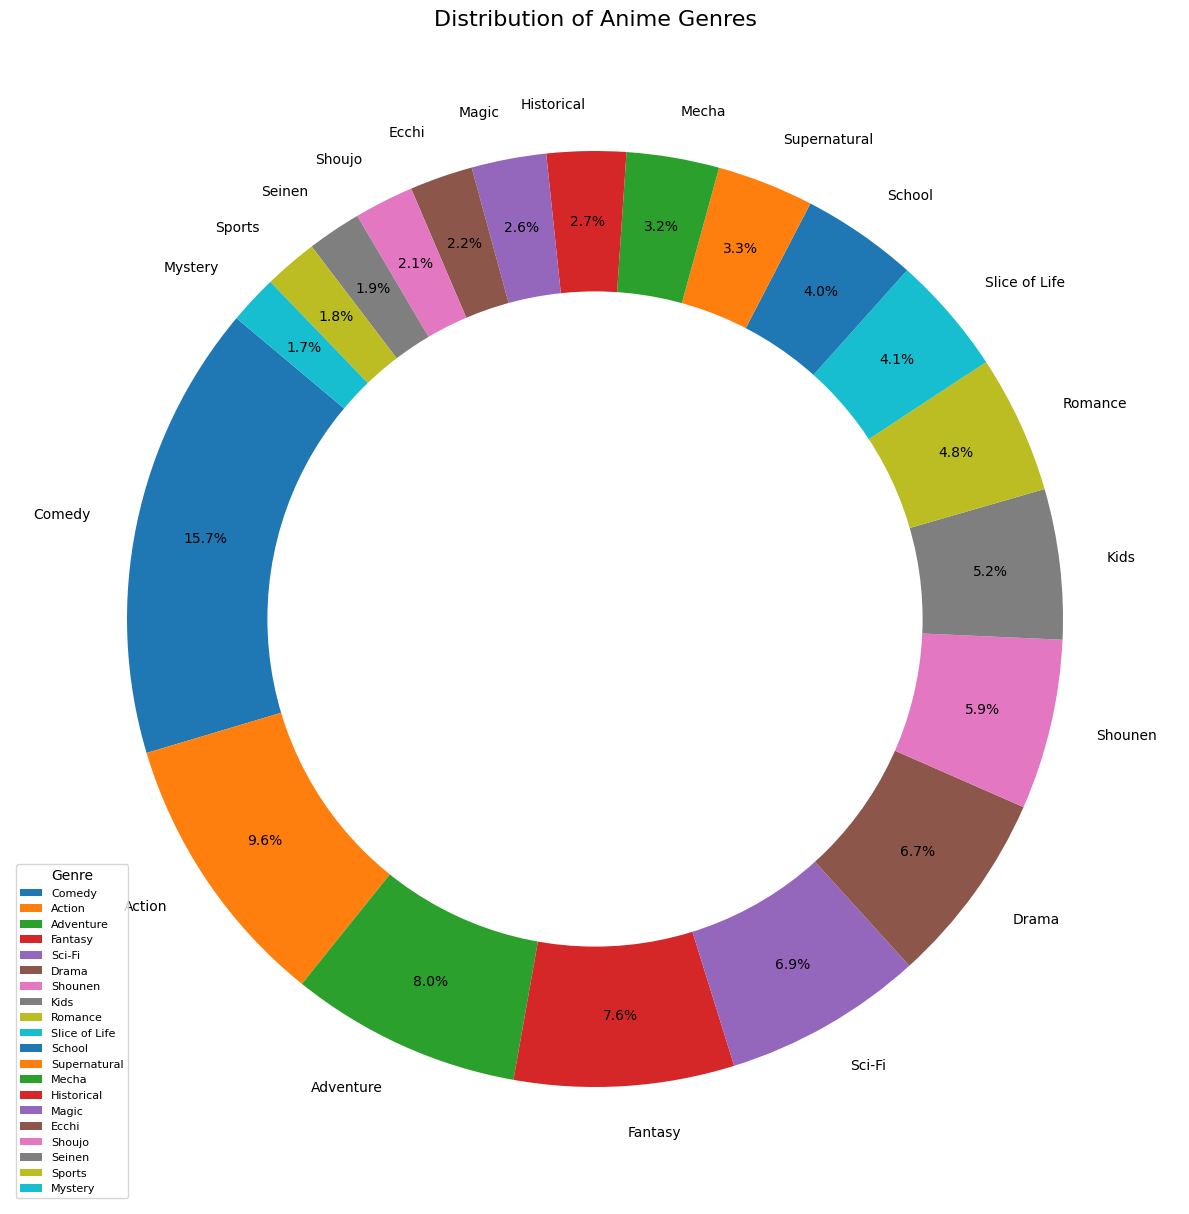

In [19]:
plt.figure(figsize=(12,15))
plt.pie(top_20_genres.values, labels=top_20_genres.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Anime Genres', fontsize=16)
plt.legend(title='Genre', loc='lower left', fontsize=8)
plt.tight_layout()
plt.show()

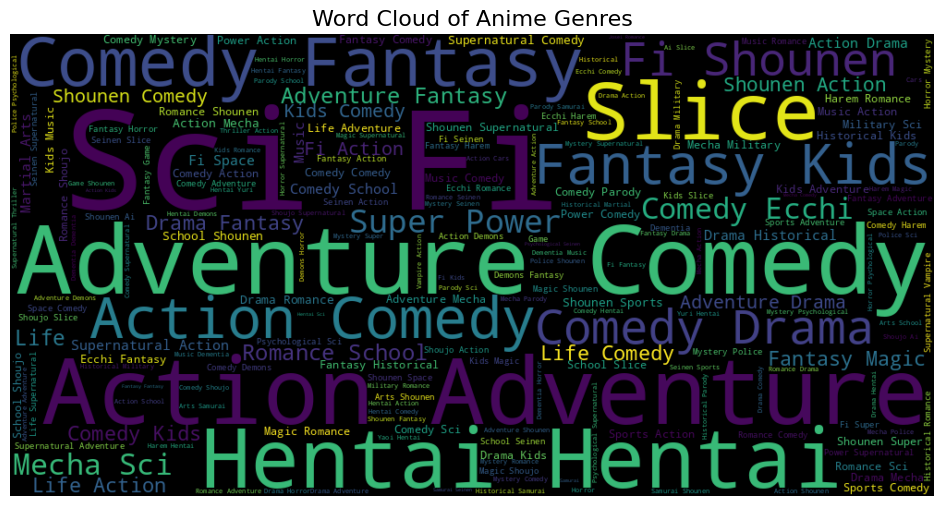

In [20]:
all_genres = df_anime[df_anime['genres'] != "UNKNOWN"]['genres'].dropna().str.cat(sep=', ')

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(all_genres)
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Anime Genres', fontsize=16)
plt.show()

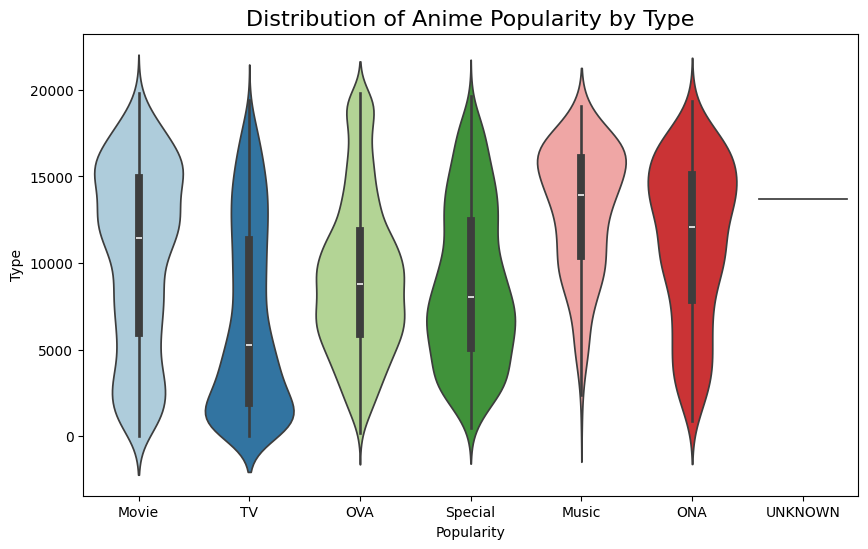

In [21]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_anime, x='type', y='popularity', palette='Paired')
plt.title('Distribution of Anime Popularity by Type', fontsize=16)
plt.xlabel("Popularity")
plt.ylabel("Type")
plt.show()

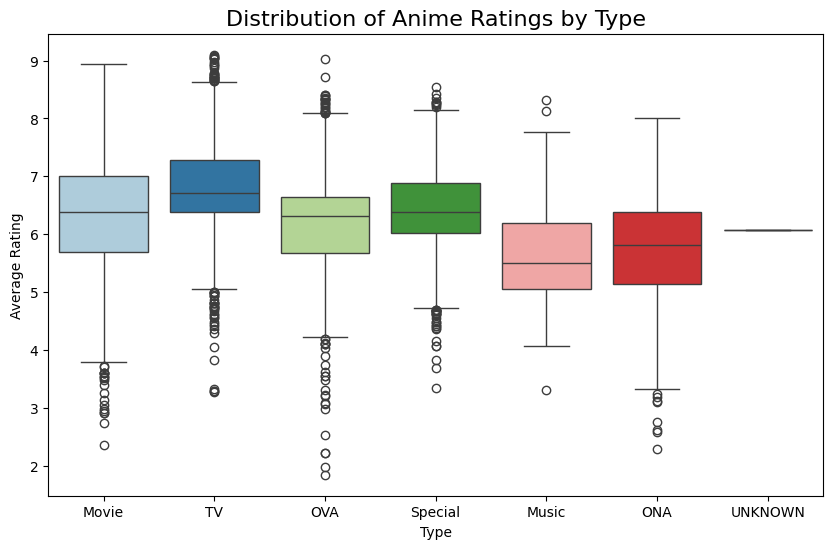

In [22]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_anime, x='type', y='average_rating', palette='Paired')
plt.title('Distribution of Anime Ratings by Type', fontsize=16)
plt.xlabel("Type")
plt.ylabel("Average Rating")
plt.show()

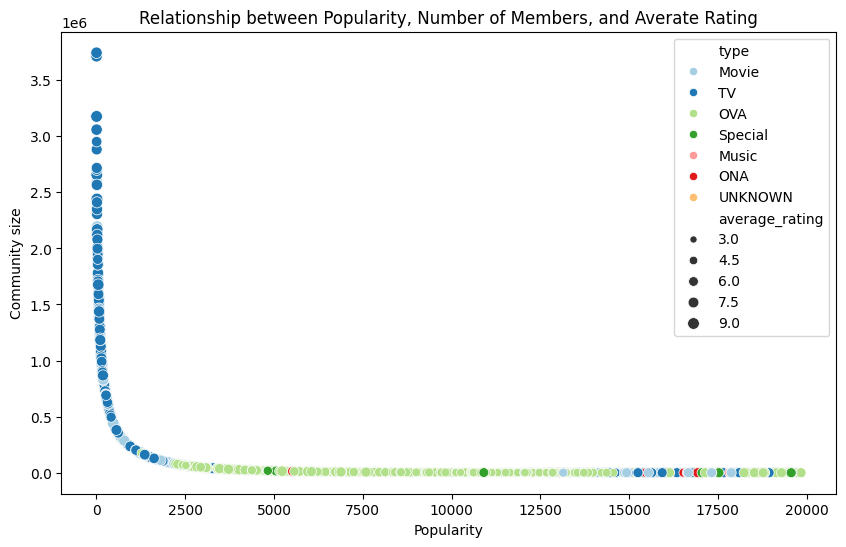

In [23]:
# Create a bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_anime, x='popularity', y='members', size='average_rating', hue='type', palette='Paired')
plt.title('Relationship between Popularity, Number of Members, and Averate Rating' )
plt.xlabel("Popularity")
plt.ylabel("Community size")
plt.show()

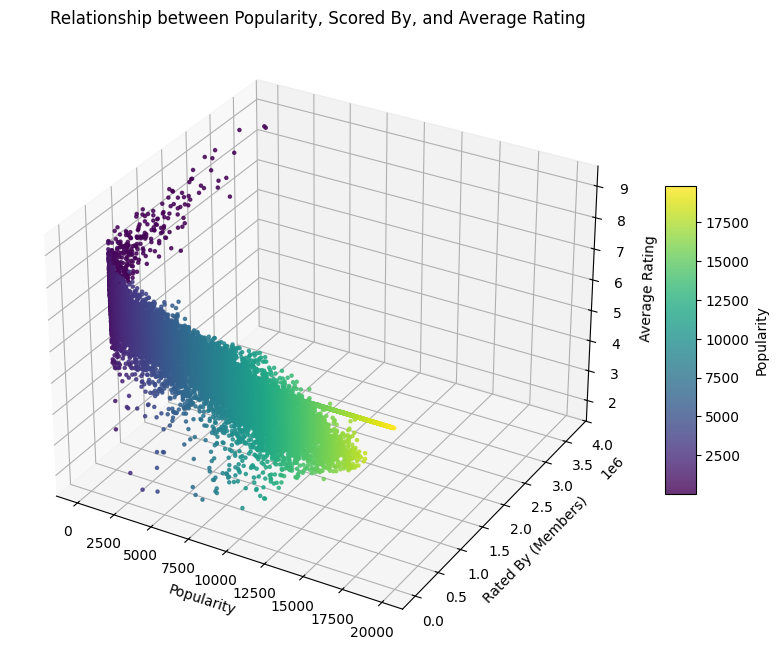

In [24]:
# # Create a 3D scatter plot 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Create the scatter plot
scatter = ax.scatter(df_anime['popularity'], df_anime['members'], df_anime['average_rating'],
                     c=df_anime['popularity'], cmap='viridis', s=5, alpha=0.8)
ax.set_xlabel('Popularity')
ax.set_ylabel('Rated By (Members)')
ax.set_zlabel('Average Rating')
ax.set_title('Relationship between Popularity, Scored By, and Average Rating') 
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Popularity') 
plt.show()

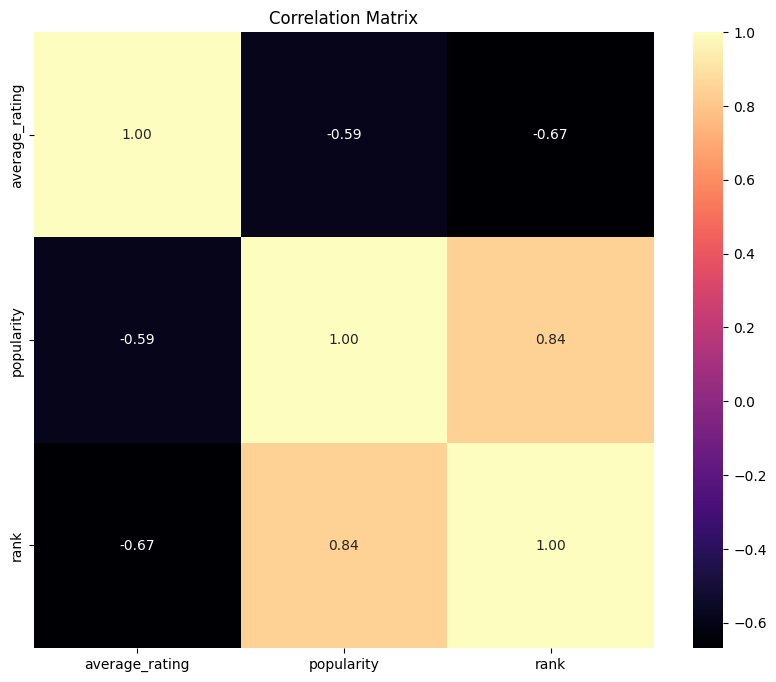

In [25]:
# Create a correlation matrix
correlation_matrix = df_anime[['average_rating', 'popularity', 'rank']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [26]:
df_anime['licensors'].value_counts()

licensors
UNKNOWN                                     8301
Funimation                                   647
Sentai Filmworks                             575
Discotek Media                               251
Media Blasters                               207
                                            ... 
Funimation, Discotek Media, Crunchyroll        1
Nozomi Entertainment, Crimson Star Media       1
Voyager Entertainment                          1
Funimation, Manga Entertainment                1
Media Blasters, Critical Mass Video            1
Name: count, Length: 253, dtype: int64

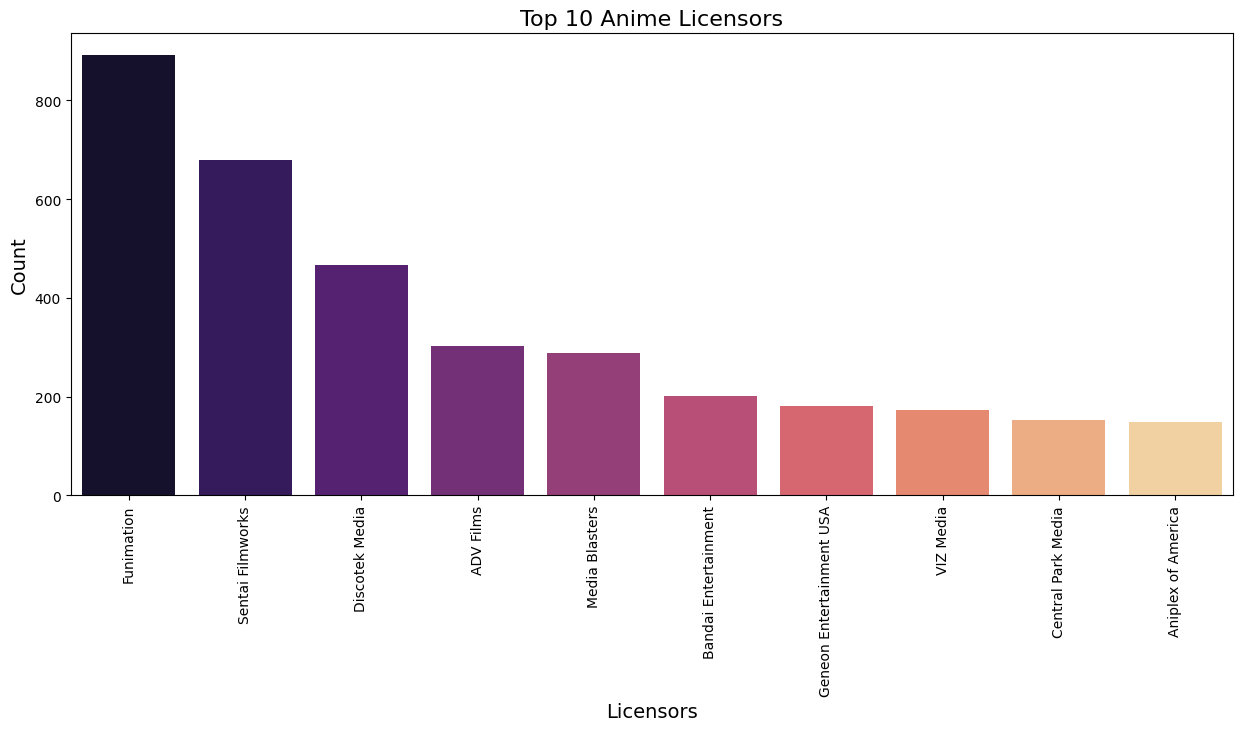

In [27]:
# Create a list of all the individual licensors
licensors_list = [licensor.strip() for licensors in df_anime[df_anime['licensors']!="UNKNOWN"]['licensors'].str.split(',') for licensor in licensors]
licensor_counts = pd.Series(licensors_list).value_counts()
filtered_licensor_counts = licensor_counts[licensor_counts.index != 'Unknown']
top_10_licensors = filtered_licensor_counts.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_licensors.index, y=top_10_licensors.values, palette='magma')
plt.title('Top 10 Anime Licensors', fontsize=16)
plt.xlabel('Licensors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [28]:
df_anime['studios'].value_counts()

studios
UNKNOWN                           2977
Toei Animation                     726
Sunrise                            442
J.C.Staff                          296
Madhouse                           294
                                  ... 
Eiken, Magic Bus                     1
Sunrise, Bandai Visual               1
AIC Spirits, Ginga Ya, Gonzino       1
Madhouse, TNK                        1
Studio Jin                           1
Name: count, Length: 941, dtype: int64

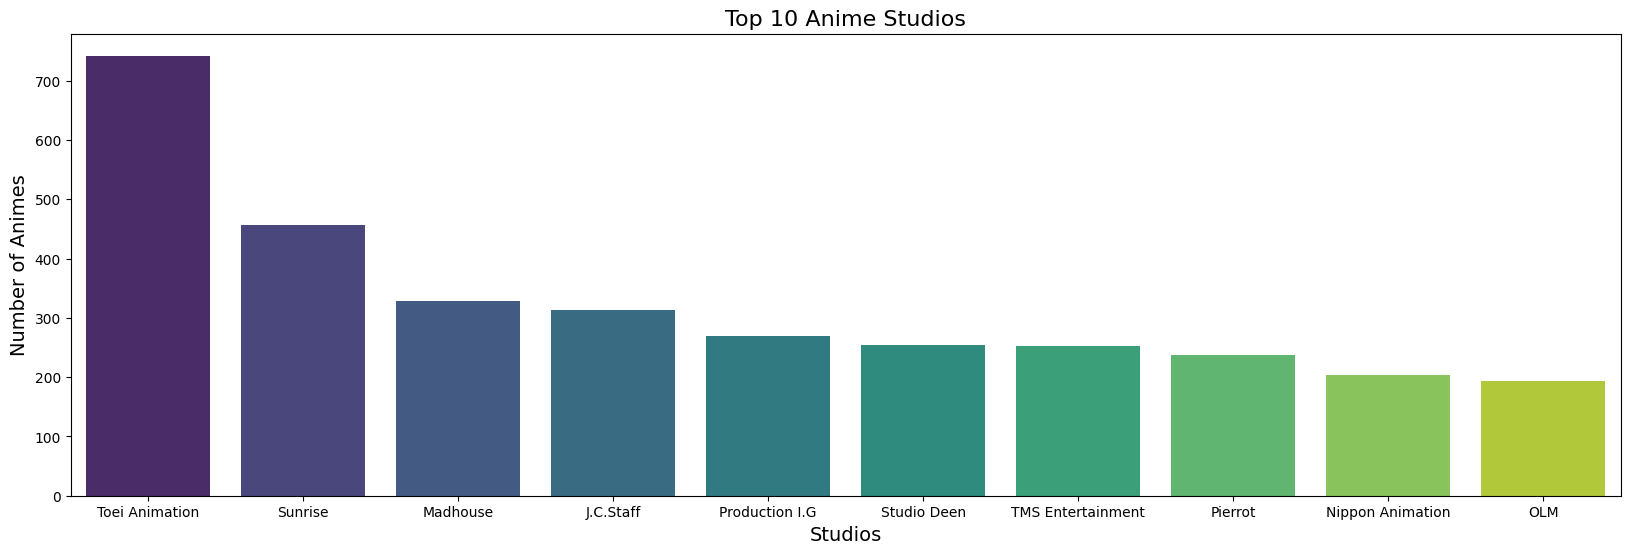

In [29]:
studios_list = [studios.strip() for studios in df_anime[df_anime['studios']!="UNKNOWN"]['studios'].str.split(',') for studios in studios]
studios_counts = pd.Series(studios_list).value_counts()
filtered_studios_counts = studios_counts[studios_counts.index != 'Unknown']
top_10_studios = filtered_studios_counts.head(10)
plt.figure(figsize=(20, 6))
sns.barplot(x=top_10_studios.index, y=top_10_studios.values, palette='viridis')
plt.xlabel('Studios', fontsize=14)
plt.ylabel('Number of Animes', fontsize=14)
plt.title('Top 10 Anime Studios', fontsize=16)
plt.show()

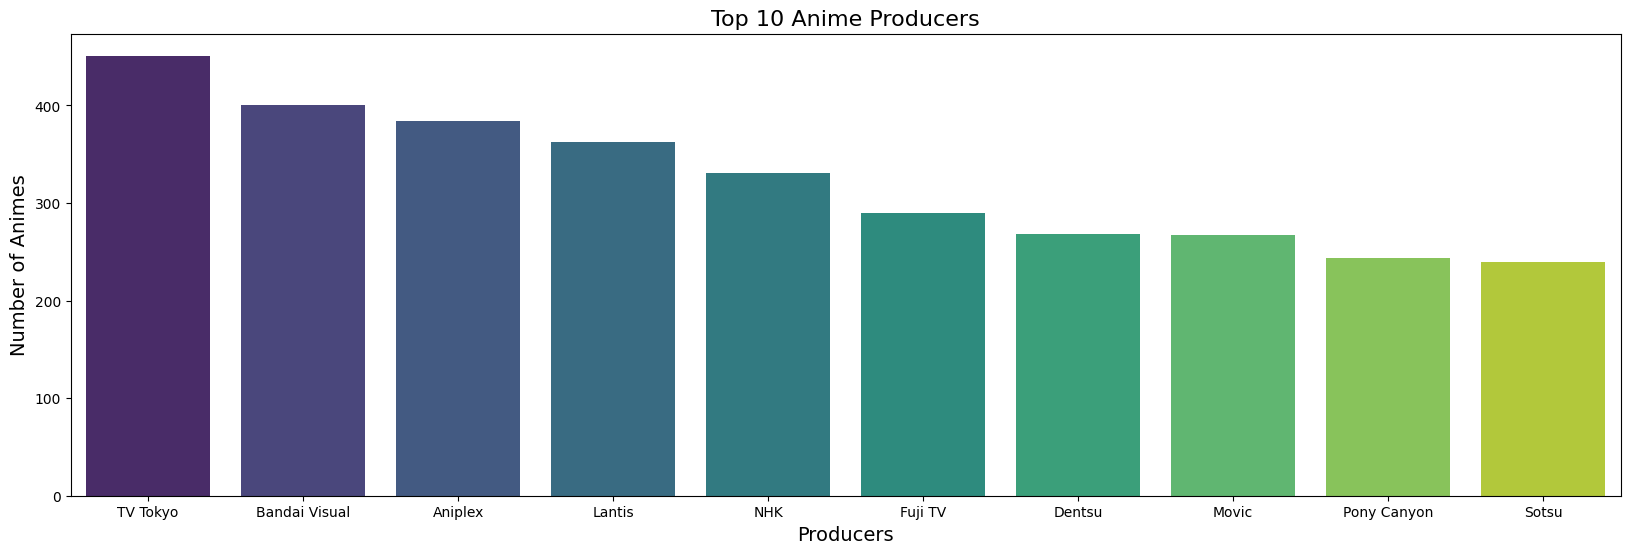

In [30]:
producers_list = [producers.strip() for producers in df_anime[df_anime['producers']!="UNKNOWN"]['producers'].str.split(',') for producers in producers]
producers_counts = pd.Series(producers_list).value_counts()
filtered_producers_counts = producers_counts[producers_counts.index != 'Unknown']
top_10_producers = filtered_producers_counts.head(10)
plt.figure(figsize=(20, 6))
sns.barplot(x=top_10_producers.index, y=top_10_producers.values, palette='viridis')
plt.xlabel('Producers', fontsize=14)
plt.ylabel('Number of Animes', fontsize=14)
plt.title('Top 10 Anime Producers', fontsize=16)
plt.show()

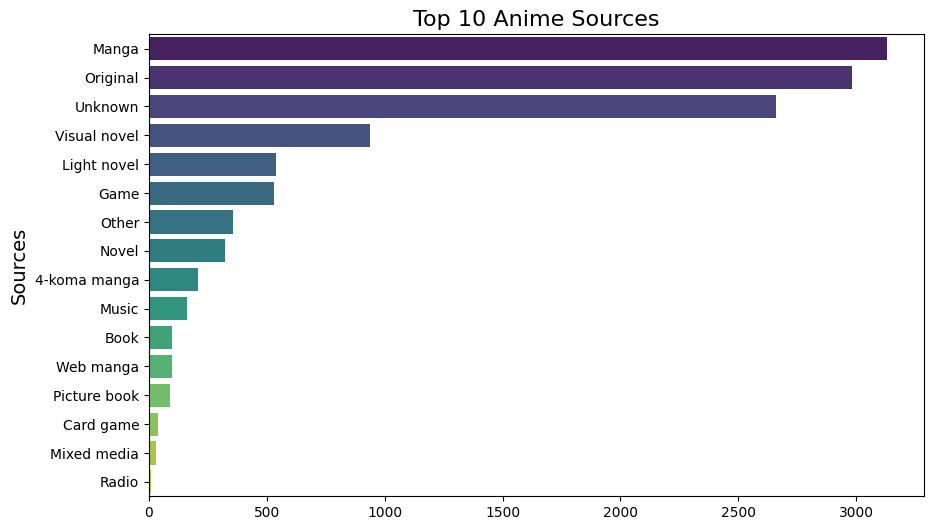

In [31]:
source_counts = df_anime['source'].value_counts()
source_counts = source_counts[source_counts.index != 'UNKNOWN'] 
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis')  
plt.ylabel('Sources', fontsize=14)
plt.title('Top 10 Anime Sources', fontsize=16)
plt.show()

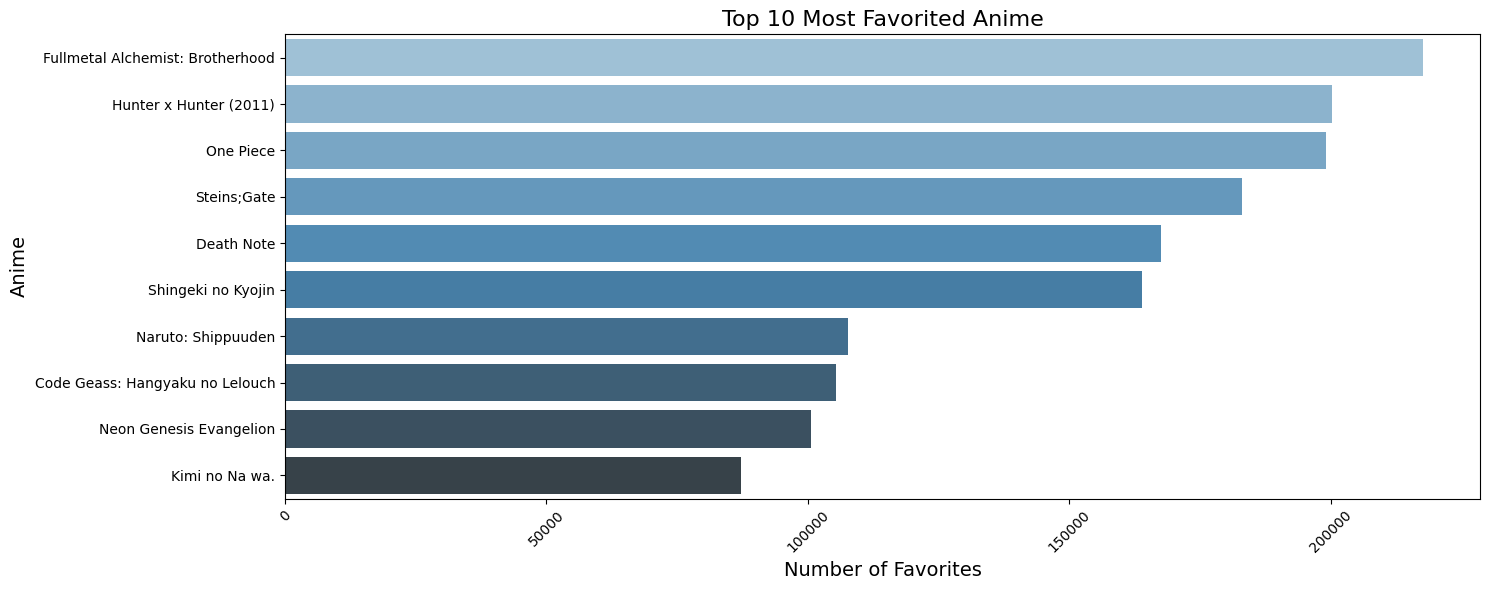

In [32]:
sorted_df = df_anime.sort_values('favorites', ascending=False)
top_favorites = sorted_df.head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x='favorites', y='name', data=top_favorites, palette='Blues_d')
plt.title('Top 10 Most Favorited Anime', fontsize=16)
plt.xlabel('Number of Favorites', fontsize=14)
plt.ylabel('Anime', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

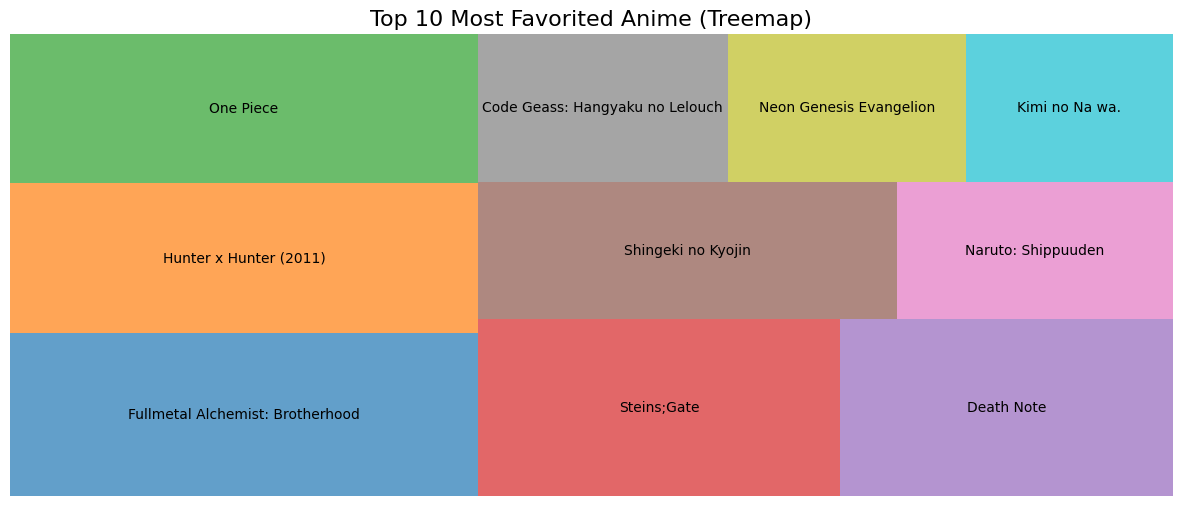

In [33]:
import squarify  
top_favorites = sorted_df.head(10)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the treemap
plt.figure(figsize=(15, 6))
squarify.plot(sizes=top_favorites['favorites'], 
              label=top_favorites['name'], 
              color=colors, 
              alpha=.7)
plt.title('Top 10 Most Favorited Anime (Treemap)', fontsize=16)
plt.axis('off')
plt.show()

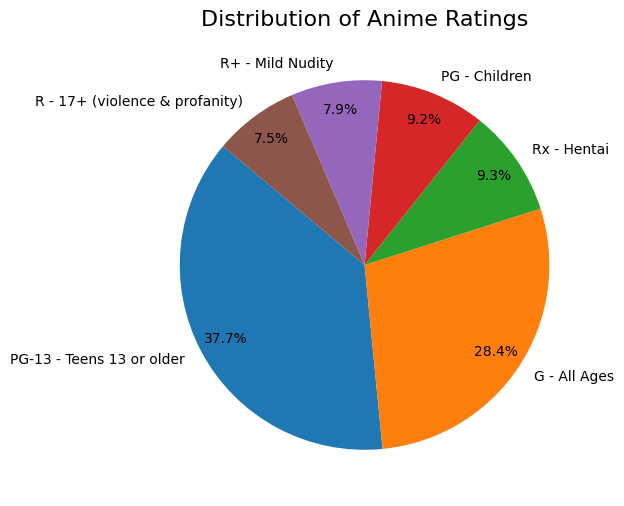

In [34]:
anime_rating_counts = df_anime[df_anime['anime_rating']!="UNKNOWN"]['anime_rating'].value_counts()
anime_rating_counts = anime_rating_counts[anime_rating_counts.index != 'Unknown']
plt.figure(figsize=(10, 6))
plt.pie(anime_rating_counts.values, labels=anime_rating_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white') 
plt.title('Distribution of Anime Ratings', fontsize=16)
plt.show() 

#### For User Score Dataset

In [35]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112830 entries, 0 to 1112829
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   user_id   1112830 non-null  int64 
 1   username  1112830 non-null  object
 2   anime_id  1112830 non-null  int64 
 3   rating    1112830 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 34.0+ MB


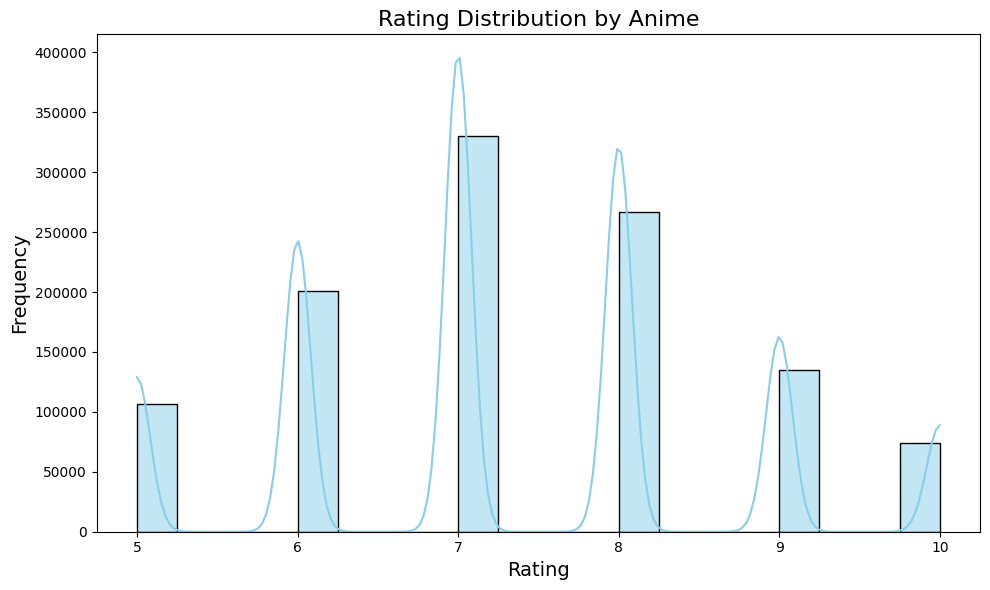

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_score['rating'], kde=True, color='skyblue', bins=20)
plt.title('Rating Distribution by Anime', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()  
plt.show() 

 

That concludes our journey through the world of anime data analysis and visualization!  

Now, let's take our insights further by training our recommendation model in the **final_ARS notebook**. Happy analyzing, and keep exploring the fascinating world of anime! 🎬✨